In [1]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf


In [2]:
import tensorflow.keras.backend as K

In [3]:
from tensorflow.keras.models import Model

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Input

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.layers import Flatten

In [8]:
from tensorflow.keras.layers import Conv2D

In [9]:
from tensorflow.keras.layers import MaxPooling2D

In [10]:
from tensorflow.keras.layers import Dropout

In [11]:
from tensorflow.keras.layers import LeakyReLU

In [12]:
from tensorflow.keras.layers import Activation

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                    

In [20]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
training_set=train_datagen.flow_from_directory('data1/train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('data1/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 340 images belonging to 3 classes.
Found 340 images belonging to 3 classes.


In [22]:
img_dims = 150
epochs = 100
batch_size = 32

In [23]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/100
10/10 [==============================] - 15s 1s/step - loss: 1.1259 - accuracy: 0.3831 - val_loss: 1.1001 - val_accuracy: 0.3719
Epoch 2/100
10/10 [==============================] - 14s 1s/step - loss: 1.0970 - accuracy: 0.3766 - val_loss: 1.0948 - val_accuracy: 0.3688
Epoch 3/100
10/10 [==============================] - 14s 1s/step - loss: 1.0997 - accuracy: 0.3734 - val_loss: 1.0935 - val_accuracy: 0.3781
Epoch 4/100
10/10 [==============================] - 15s 1s/step - loss: 1.0969 - accuracy: 0.3734 - val_loss: 1.0944 - val_accuracy: 0.3812
Epoch 5/100
10/10 [==============================] - 14s 1s/step - loss: 1.0967 - accuracy: 0.3636 - val_loss: 1.0947 - val_accuracy: 0.3750
Epoch 6/100
10/10 [==============================] - 14s 1s/step - loss: 1.0977 - accuracy: 0.3636 - val_loss: 1.0937 - val_accuracy: 0.3656
Epoch 7/100
10/10 [==============================] - 14s 1s/step - loss: 1.0742 - accuracy: 0.3766 - val_loss: 1.0637 - val_accuracy: 0.3688
Epoch 8/100
1

Epoch 59/100
10/10 [==============================] - 17s 2s/step - loss: 1.0944 - accuracy: 0.3750 - val_loss: 1.0961 - val_accuracy: 0.3656
Epoch 60/100
10/10 [==============================] - 15s 1s/step - loss: 1.0947 - accuracy: 0.3571 - val_loss: 1.0945 - val_accuracy: 0.3719
Epoch 61/100
10/10 [==============================] - 15s 1s/step - loss: 1.0964 - accuracy: 0.3669 - val_loss: 1.0963 - val_accuracy: 0.3594
Epoch 62/100
10/10 [==============================] - 15s 2s/step - loss: 1.0966 - accuracy: 0.3701 - val_loss: 1.0953 - val_accuracy: 0.3625
Epoch 63/100
10/10 [==============================] - 15s 2s/step - loss: 1.0981 - accuracy: 0.3636 - val_loss: 1.0941 - val_accuracy: 0.3781
Epoch 64/100
10/10 [==============================] - 16s 2s/step - loss: 1.0983 - accuracy: 0.3506 - val_loss: 1.0953 - val_accuracy: 0.3719
Epoch 65/100
10/10 [==============================] - 15s 2s/step - loss: 1.0958 - accuracy: 0.3734 - val_loss: 1.0955 - val_accuracy: 0.3688
Epoch 

In [24]:
import matplotlib.pyplot as plt

In [25]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

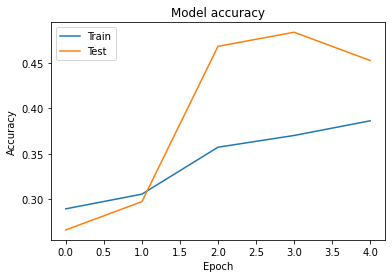

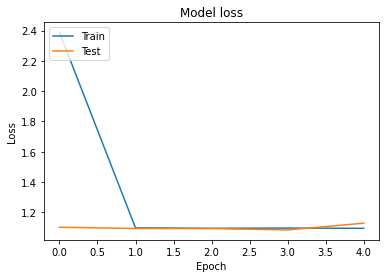

In [26]:
graph()